# LOGISTIC REGRESSION

## Import Packages and Data

In [1]:
#Import basic packages
import pandas as pd
import numpy as np

#Import vizualization packages
import matplotlib.pyplot as plt
import seaborn as sns

#Import linear model packages
from sklearn.model_selection import train_test_split
from sklearn import linear_model
from sklearn.linear_model import LogisticRegression


#Import decision tree packages
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier

from sklearn.preprocessing import LabelEncoder
from sklearn import metrics
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import roc_curve
from sklearn.metrics import auc
from sklearn.metrics import plot_roc_curve
from sklearn.metrics import roc_auc_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import f1_score
from sklearn.metrics import recall_score

In [2]:
#Read the Data

df = pd.read_csv('https://github.com/ArinB/CA05-B-Logistic-Regression/raw/master/cvd_data.csv')

In [3]:
#Checking the number of rows and columns in dataset

df.shape

(3242, 17)

In [4]:
#Looking into the first five records in the dataset

df.head()

,cvd_4types,age_s1,race,educat,mstat,hip,neck20,waist,av_weight_kg,cgpkyr,tea15,srhype,parrptdiab,bend25,happy25,tired25,hlthlm25
0,0,54,1,2,1,110.0,40.0,108.0,87.5,34.0,0,1,0,1,2,3,4
1,0,56,3,2,1,113.0,34.0,107.0,83.5,0.0,0,0,0,2,2,1,3
2,0,54,1,3,1,110.0,44.5,105.0,86.2,49.5,0,0,0,3,2,6,4
3,0,54,1,3,1,129.0,42.5,110.0,89.1,0.0,0,0,0,3,2,1,3
4,0,51,3,2,1,122.0,37.0,113.0,81.3,0.0,0,0,0,2,1,1,2


In [5]:
#Checking dataset info

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3242 entries, 0 to 3241
Data columns (total 17 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   cvd_4types    3242 non-null   int64  
 1   age_s1        3242 non-null   int64  
 2   race          3242 non-null   int64  
 3   educat        3242 non-null   int64  
 4   mstat         3242 non-null   int64  
 5   hip           3242 non-null   float64
 6   neck20        3242 non-null   float64
 7   waist         3242 non-null   float64
 8   av_weight_kg  3242 non-null   float64
 9   cgpkyr        3242 non-null   float64
 10  tea15         3242 non-null   int64  
 11  srhype        3242 non-null   int64  
 12  parrptdiab    3242 non-null   int64  
 13  bend25        3242 non-null   int64  
 14  happy25       3242 non-null   int64  
 15  tired25       3242 non-null   int64  
 16  hlthlm25      3242 non-null   int64  
dtypes: float64(5), int64(12)
memory usage: 430.7 KB


In [6]:
#Understanding metrics of the dataset

df.describe()

,cvd_4types,age_s1,race,educat,mstat,hip,neck20,waist,av_weight_kg,cgpkyr,tea15,srhype,parrptdiab,bend25,happy25,tired25,hlthlm25
count,3242.000000,3242.000000,3242.000000,3242.000000,3242.000000,3242.000000,3242.000000,3242.000000,3242.000000,3242.000000,3242.000000,3242.000000,3242.000000,3242.000000,3242.000000,3242.000000,3242.000000
mean,0.590068,64.828809,1.094695,2.326342,1.368600,105.404832,37.550719,97.209904,82.945928,12.904010,0.430907,0.327884,0.067551,2.473782,2.281308,4.292721,3.864898
std,0.491897,10.400496,0.358237,0.697934,0.933871,10.280402,4.101003,13.598060,7.849650,20.156736,1.242444,0.469515,0.251012,0.672158,0.951695,1.021099,0.614247
min,0.000000,39.000000,1.000000,1.000000,1.000000,44.000000,25.000000,67.000000,57.400000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000
25%,0.000000,57.000000,1.000000,2.000000,1.000000,99.000000,34.425000,88.000000,78.200000,0.000000,0.000000,0.000000,0.000000,2.000000,2.000000,4.000000,4.000000
50%,1.000000,65.000000,1.000000,2.000000,1.000000,104.000000,37.150000,97.000000,82.550000,0.300000,0.000000,0.000000,0.000000,3.000000,2.000000,4.000000,4.000000
75%,1.000000,73.000000,1.000000,3.000000,1.000000,110.000000,40.500000,106.000000,86.575000,20.475000,0.000000,1.000000,0.000000,3.000000,3.000000,5.000000,4.000000
max,1.000000,90.000000,3.000000,4.000000,8.000000,168.000000,53.000000,135.000000,136.700000,170.500000,30.000000,1.000000,1.000000,3.000000,6.000000,6.000000,5.000000


In [7]:
#Looking for null values in dataset

df.isnull().sum()

cvd_4types      0
age_s1          0
race            0
educat          0
mstat           0
hip             0
neck20          0
waist           0
av_weight_kg    0
cgpkyr          0
tea15           0
srhype          0
parrptdiab      0
bend25          0
happy25         0
tired25         0
hlthlm25        0
dtype: int64

## Data Cleaning

<AxesSubplot:>

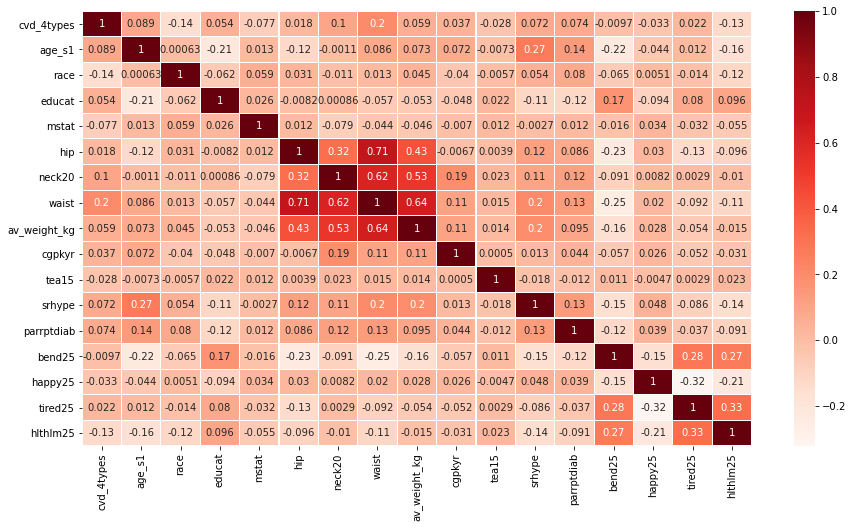

In [8]:
#Checking for multicollinearity
plt.figure(figsize = (15,8))
sns.heatmap(df.corr(), annot = True, linewidths = 0.1, cmap = 'Reds')

In [9]:
#Dropping columns with high multicollinearity

df = df.drop(['hip','waist'], axis = 1)

## Building Binary Classifier Model to predict CVD Risk using a Logistic Regression Model

In [10]:
#Selecting dependent and independent variables

x = df.drop(['cvd_4types'],axis = 1)
y = df.cvd_4types

In [11]:
#Splitting data into training and testing

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.3, random_state = 101)

### MODEL 1

In [12]:
#Creating our logistic regression model

log_reg1 = linear_model.LogisticRegression(C = 1e40, solver = 'newton-cg')

In [13]:
#Fitting the model with the data

fitted_model = log_reg1.fit(x_train, y_train)

In [14]:
#Predicting the accuracy of the model

y_pred = log_reg1.predict(x_test)
print("Logistic regression model 1 accuracy is", round(accuracy_score(y_test.values.flatten(),y_pred),2))

Logistic regression model 1 accuracy is 0.66


### MODEL 2

In [15]:
#Adding a penalty as a punishment for large number of variables

log_reg2 = linear_model.LogisticRegression(solver = 'newton-cg', random_state = 100, penalty = 'l2') 

In [16]:
#Fitting the model with the data

fitted_model2 = log_reg2.fit(x_train,y_train)

In [17]:
y_pred2 = log_reg2.predict(x_test)
print("Logistic regression model 2 accuracy is", round(fitted_model2.score(x_test,y_test),10))

Logistic regression model 2 accuracy is 0.6639260021


## Displaying the Feature of all the Features in Decreasing Influence

In [18]:
#Creating a variable to store the Logistic regression function

lr = LogisticRegression()
lr.fit(x_train, y_train)

/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [19]:
#Higher value of coefficients will imply larger influence of the corresponding features on the outcome

features = np.std(x_train,0)*lr.coef_[0]
features.sort_values(ascending=False)

educat          0.162813
neck20          0.138841
age_s1          0.135672
tired25         0.127144
av_weight_kg    0.098013
srhype          0.088411
parrptdiab      0.080054
bend25          0.046607
cgpkyr          0.025312
tea15          -0.019916
happy25        -0.061932
mstat          -0.142475
race           -0.309425
hlthlm25       -0.422176
dtype: float64

In [20]:
#According to the results, the most important features are educat, neck20, age_s1 and tired25

## Evaluate Performance of Model and ROC Curve

In [21]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.71      0.36      0.48       415
           1       0.65      0.89      0.75       558

    accuracy                           0.66       973
   macro avg       0.68      0.63      0.62       973
weighted avg       0.68      0.66      0.64       973



Text(0.5, 1.0, 'ROC Curve')

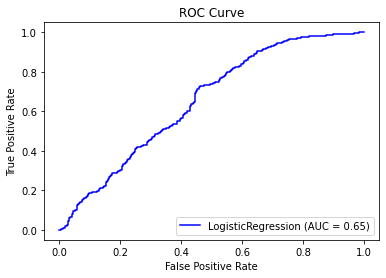

In [22]:
#Graphing the ROC curve

plot_roc_curve(log_reg2, x_test, y_test, color = "blue")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")